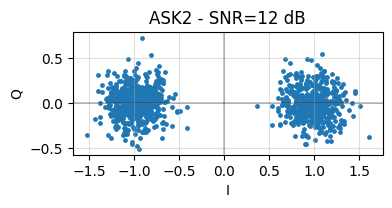

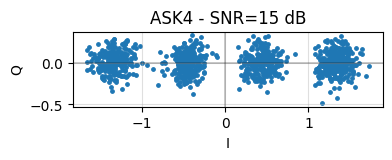

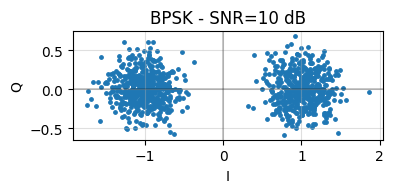

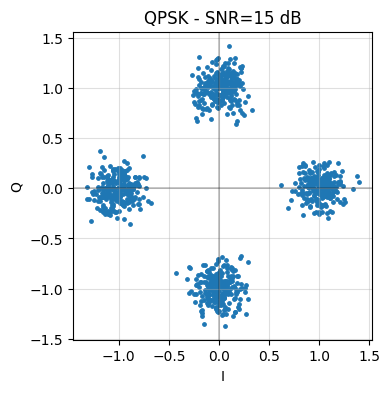

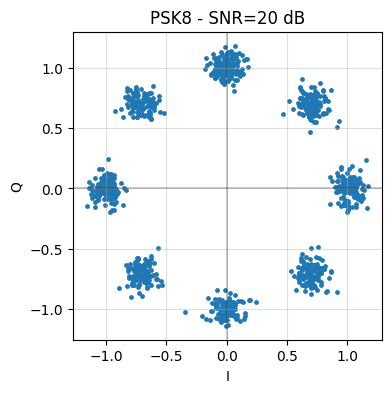

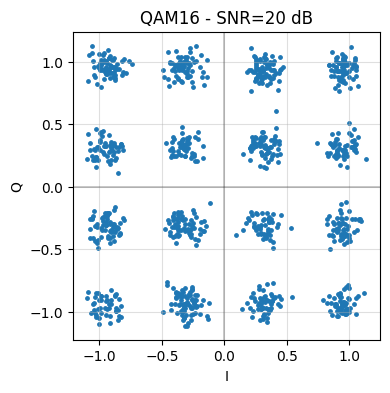

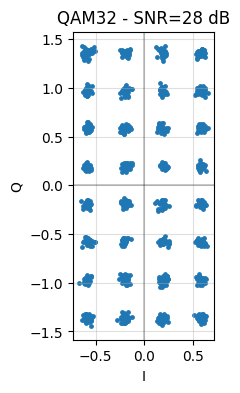

In [5]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# --- para poder importar src/ desde notebooks/ ---
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

from src.generate_signals import generate_baseband

# Modulación y SNR "bonito" para ver bien las constelaciones
modulations = ["ASK2", "ASK4", "BPSK", "QPSK", "PSK8", "QAM16", "QAM32"]
snr_por_mod = {
    "ASK2": 12,   # más bajo para que se vea la nube
    "ASK4": 15,
    "BPSK": 10,
    "QPSK": 15,
    "PSK8": 20,
    "QAM16": 20,
    "QAM32": 28,
}

Nsym  = 2000      # símbolos generados
Nplot = 1000      # cuántos puntos mostrar

for mod in modulations:
    snr = snr_por_mod[mod]

    out = generate_baseband(mod, Nsym=Nsym, snr_db=snr)
    s = out["s_noisy"][:Nplot]

    I = np.real(s)
    Q = np.imag(s)

    plt.figure(figsize=(4, 4))
    plt.scatter(I, Q, s=6)
    plt.title(f"{mod} - SNR={snr} dB")
    ax = plt.gca()
    ax.axhline(0, color='k', linewidth=0.3)
    ax.axvline(0, color='k', linewidth=0.3)
    ax.set_xlabel("I")
    ax.set_ylabel("Q")
    ax.grid(True, alpha=0.4)
    ax.set_aspect('equal', 'box')   # <<< esto hace que las nubes se vean circulares
    plt.show()





